- 많은 문장과 문서중에서 유사한 문장을 찾는 방법
- 문장을 벡터로 표현, 백터간 거리를 구할 수 있다
- 벡터화 할 때 단어의 의미를 포함하여 벡터화 할 경우  
- 분포가설에 따라 가까운 거리일수록 의미적으로 가까운 텍스트
- 비슷한 내용을 가진 텍스트를 벡터화 해서 백터간 거리를 구해본다면 가까운 거리일수록 의미적으로 가까운 텍스트이다.

In [31]:
# 머신러닝 모듈
from sklearn.feature_extraction.text import CountVectorizer

### CountVectorizer
- 문서를 토큰 리스트로 변환
- 각 문서의 토큰 출현 빈도를 카운트
- 각 문서의 BOW(Bag of Words)를 벡터로 변환한다
- Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

In [32]:
# min_df는 해당 값보다 빈도수가 낮은 단어는 무시하겠다는 뜻
# max_df는 해당 값보다 많이 나오는, 빈도수가 높은 단어는 무시하겠다는 뜻
vectorizer = CountVectorizer(min_df=1)

In [33]:
# 몇가지로 테스트
contents =['짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?',
          '짱구는 공원에서 산책하고 노는 것을 싫어해요.',
          '짱구는 공원에서 노는 것도 싫어해요. 이상해요.',
          '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 여행을 가지 못하고 있어요']

In [34]:
# 벡터화
x = vectorizer.fit_transform(contents)
x.shape

(4, 22)

In [35]:
print(len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)

22
{'짱구랑': 21, '놀러가고': 7, '싶지만': 15, '바쁜데': 11, '어떻하죠': 16, '짱구는': 20, '공원에서': 4, '산책하고': 12, '노는': 6, '것을': 2, '싫어해요': 13, '것도': 1, '이상해요': 18, '곳으로': 3, '여행을': 17, '떠나고': 8, '싶은데': 14, '너무': 5, '바빠서': 10, '가지': 0, '못하고': 9, '있어요': 19}


In [36]:
# 특정 feature 이름을 확인
tmp = vectorizer.get_feature_names()

In [37]:
print(len(tmp))
print( tmp)

22
['가지', '것도', '것을', '곳으로', '공원에서', '너무', '노는', '놀러가고', '떠나고', '못하고', '바빠서', '바쁜데', '산책하고', '싫어해요', '싶은데', '싶지만', '어떻하죠', '여행을', '이상해요', '있어요', '짱구는', '짱구랑']


In [38]:
# 문장의 수
x.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0]],
      dtype=int64)

In [39]:
print(x)

  (0, 16)	1
  (0, 11)	1
  (0, 15)	1
  (0, 7)	1
  (0, 21)	1
  (1, 13)	1
  (1, 2)	1
  (1, 6)	1
  (1, 12)	1
  (1, 4)	1
  (1, 20)	1
  (2, 18)	1
  (2, 1)	1
  (2, 13)	1
  (2, 6)	1
  (2, 4)	1
  (2, 20)	1
  (3, 19)	1
  (3, 9)	1
  (3, 0)	1
  (3, 10)	1
  (3, 5)	1
  (3, 14)	1
  (3, 8)	1
  (3, 17)	2
  (3, 3)	1


In [40]:
# 각 feature(특성)에 대한 벡터값
x.toarray().transpose()
# 가지:0 -> 0,0,0,1 네번째 문장에 한번 나타남.

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0]], dtype=int64)

In [41]:
# (4, 22) 언 패킹
# 훈련 할 샘플 수 (훈련데이터수), 특성 수
x.shape

(4, 22)

In [42]:
num_samples, num_features = x.shape
print(num_samples, num_features)

4 22


In [43]:
# 신규 데이터 문장을 벡터로 만들어서 유사도 체크
contents

['짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?',
 '짱구는 공원에서 산책하고 노는 것을 싫어해요.',
 '짱구는 공원에서 노는 것도 싫어해요. 이상해요.',
 '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 여행을 가지 못하고 있어요']

In [44]:
new_texts = ['짱구랑 공원에서 산책하고 짱구랑 놀고 싶어요']
new_texts_vec = vectorizer.transform(new_texts)
tmp = new_texts_vec.toarray()
print(len(tmp), tmp.shape, tmp)
#특성이 문장안에 있으면 1, 없으면 0 해서 개수가 종 22개짜리

1 (1, 22) [[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]]


In [45]:
# SciPy는 파이썬을 기반의 과학, 분석, 그리고 엔지니어링을 위한 과학(계산)적 컴퓨팅 영역의 여러 기본적인 작업을 위한 라이브러리(패키지 모음)
import scipy as sp

In [46]:
# 거리 계산 -> v1, v2를 각각 나름 정규화(sp.linalg.norm)를 통해 정리를 하고 다시 계산 (0~1사이의 값을 갖도록 할수도 있음. )
def distance_vec(v1, v2):
    delta = v1 - v2
    # 유클리드 거리 계산 사용되고 - 유클리드 노름
    # 일반적으로 두 점 사이에 거리를 계산 할 때 사용!!
    return sp.linalg.norm(delta.toarray())

In [47]:
# 테스트 데이터를 훈련 데이터와 거리를 계산 하면서 최소 거리에 있는 훈련 데이터를 찾는다
# 이것이 가장 유사도가 높은 문장이다
# 훈련데이터에서 벡터를 뽑는 방법

In [48]:
print(x.getrow(0))

  (0, 16)	1
  (0, 11)	1
  (0, 15)	1
  (0, 7)	1
  (0, 21)	1


In [49]:
print(x.getrow(0).toarray())

[[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1]]


In [50]:
print(new_texts_vec)

  (0, 4)	1
  (0, 12)	1
  (0, 21)	2


In [51]:
print(new_texts_vec.toarray())

[[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]]


In [52]:
distance_vec(x.getrow(0), new_texts_vec)

2.6457513110645907

In [55]:
min_distance = 65536-1 
min_index = None
for i in range(len(contents)):
    dis = distance_vec(x.getrow(i), new_texts_vec)
    #print(dis, i, contents[i])
    if dis < min_distance:
        min_distance = dis
        min_index = i
else:  #for문이 중간에 break 등으로 끊기지 않고, 끝까지 수행 되었을 때 수행하는 코드
    print('최소거리 : ', min_distance, min_index, contents[min_index])

최소거리 :  2.6457513110645907 0 짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?


In [56]:
type(min_distance)

numpy.float64

- **한글 벡터화의 합리적인 처리**

In [13]:
from konlpy.tag import Okt
t = Okt()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


- nouns : 명사 추출
- morphs : 형태소 추출
- pos : 품사 부착

In [14]:
t.morphs(contents[0])

['짱구', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?']

In [15]:
contents

['짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?',
 '짱구는 공원에서 산책하고 노는 것을 싫어해요.',
 '짱구는 공원에서 노는 것도 싫어해요. 이상해요.',
 '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 여행을 가지 못하고 있어요']

In [16]:
contents_ko_vectorize = [' '.join(t.morphs(content)) for content in contents]

In [17]:
contents_ko_vectorize

['짱구 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 '짱구 는 공원 에서 산책 하고 노 는 것 을 싫어해요 .',
 '짱구 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 '먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 여행 을 가지 못 하고 있어요']

In [18]:
X = vectorizer.fit_transform(contents_ko_vectorize)
num_samples, num_features = X.shape
print(X.shape)

(4, 20)


In [19]:
print(vectorizer.get_feature_names())

['가고', '가지', '공원', '너무', '놀러', '떠나고', '바빠서', '바쁜데', '산책', '싫어해요', '싶은데', '싶지만', '어떻하죠', '에서', '여행', '으로', '이상해요', '있어요', '짱구', '하고']


In [20]:
# 신규데이터 '짱구랑 공원에서 산책하고 놀고 싶어요' 이것과 거리가 가장 가까운 문자를 찾으시오
new_texts = ['짱구랑 공원에서 산책하고 짱구랑 놀고 싶어요']

In [21]:
# 신규데이터를 -> 훈련데이터를 정제하던 과정 그대로 전처리 후 테스트 수행
new_texts = [' '.join(t.morphs(txt)) for txt in new_texts]

In [22]:
new_texts

['짱구 랑 공원 에서 산책 하고 짱구 랑 놀고 싶어요']

In [23]:
new_texts_vec = vectorizer.transform(new_texts)
new_texts_vec.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1]],
      dtype=int64)

In [28]:
min_distance = 65536 - 1
min_index = None
for i in range(len(contents)):
    dis = distance_vec(X.getrow(i), new_texts_vec)
    print(dis, i, contents[i])
    if dis < min_distance:
        min_distance = dis
        min_index = i
else:
    print('최소거리 : ', min_distance, min_index, contents[min_index])

3.1622776601683795 0 짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?
1.4142135623730951 1 짱구는 공원에서 산책하고 노는 것을 싫어해요.
2.23606797749979 2 짱구는 공원에서 노는 것도 싫어해요. 이상해요.
4.242640687119285 3 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 여행을 가지 못하고 있어요
최소거리 :  1.4142135623730951 1 짱구는 공원에서 산책하고 노는 것을 싫어해요.


In [29]:
# 문장의 벡터값을 확인해서 비교
for i in range(len(contents)):
    if i == min_index:
        print(contents[i])
        print(X.getrow(i).toarray())
print('-'*50)
print(new_texts)
print(new_texts_vec.toarray())

짱구는 공원에서 산책하고 노는 것을 싫어해요.
[[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1]]
--------------------------------------------------
['짱구 랑 공원 에서 산책 하고 짱구 랑 놀고 싶어요']
[[0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 2 1]]


In [36]:
# 거리 계산 -> v1, v2를 각각 나름 정규화(sp.linalg.norm)를 통해 정리를 하고 다시 계산
def distance_vec_normalized(v1, v2):
    v1.normalized = v1 / sp.linalg.norm(v1.toarray())
    v2.normalized = v2 / sp.linalg.norm(v2.toarray())
    delta = v1 - v2
    # 유클리드 거리 계산 사용되고 - 유클리드 노름
    # 일반적으로 두 점 사이에 거리를 계산 할 때 사용!!
    return sp.linalg.norm(delta.toarray())

In [37]:
min_distance = 65536 - 1
min_index = None
for i in range(len(contents)):
    dis = distance_vec_normalized(X.getrow(i), new_texts_vec)
    print(dis, i, contents[i])
    if dis < min_distance:
        min_distance = dis
        min_index = i
else:
    print('최소거리 : ', min_distance, min_index, contents[min_index])

3.1622776601683795 0 짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?
1.4142135623730951 1 짱구는 공원에서 산책하고 노는 것을 싫어해요.
2.23606797749979 2 짱구는 공원에서 노는 것도 싫어해요. 이상해요.
4.242640687119285 3 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 여행을 가지 못하고 있어요
최소거리 :  1.4142135623730951 1 짱구는 공원에서 산책하고 노는 것을 싫어해요.


### tf, idf 활용해서 더 향상시킨다
- tf : term frequency -> 어떤 단어가 문서 내에서 자주 등장 할 수록 주요도가 높아진다
- idf : inverse document frequency -> 문서간 비교시 모든 문서상에서 같은 단어 있다면,  
특히 그 단어가 어휘라고 볼 수 있을지 없을지 모르겠으나 이런 단어는 비교시에 중요한 단어가 아니다
- 테스트 마이닝 장르에서 단어별로 부과하는 가중치 적용법

In [ ]:
contents_ko_vectorize = [' '.join(t.morphs(content)) for content in contents]

In [38]:
import scipy as sp
def myTfIdf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w)for w in set(d))
    idf = sp.log(float(len(D))) / (len([doc for doc in D if t in doc]))
    return tf, idf

In [39]:
a, abb, abc = ['가'], ['가', '나', '나'], ['가', '나', '다']
D = [a, abb, abc]
print(myTfIdf('가', a, D))
print(myTfIdf('나', abb, D))
print(myTfIdf('가', abc, D))
print(myTfIdf('나', abc, D))
print(myTfIdf('다', abc, D))

(1.0, 0.3662040962227033)
(0.6666666666666666, 0.5493061443340549)
(0.3333333333333333, 0.3662040962227033)
(0.3333333333333333, 0.5493061443340549)
(0.3333333333333333, 1.0986122886681098)


- 결과 설명  
'가'를 넘겨서 '가'를 비교 해서 t각 1.0이 나옴  
(1.0, 0.3662040962227033)  

(0.6666666666666666, 0.5493061443340549)

### 라이브러리에서 tf, idf를 사용하여 벡터화 처리하는 클래스 제공

decode_error : { 'strict', 'ignore', 'replace'}
지정된 바이트 문자가 아닌 문자를 포함하는 바이트 시퀀스를 분석 할 경우 수행 할 작업에 대한 지침입니다 
기본적으로 'strict'이므로 UnicodeDecodeError가 발생

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [2]:
from konlpy.tag import Okt
t = Okt()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
# 몇가지로 테스트
contents =['짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?',
          '짱구는 공원에서 산책하고 노는 것을 싫어해요.',
          '짱구는 공원에서 노는 것도 싫어해요. 이상해요.',
          '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 여행을 가지 못하고 있어요']

In [6]:
contents_ko_vectorize = [' '.join(t.morphs(content)) for content in contents]

In [7]:
contents_ko_vectorize

['짱구 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 '짱구 는 공원 에서 산책 하고 노 는 것 을 싫어해요 .',
 '짱구 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 '먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 여행 을 가지 못 하고 있어요']

In [8]:
# 훈련
X = vectorizer.fit_transform(contents_ko_vectorize)
num_samples, num_features = X.shape
print(num_samples, num_features)

4 20


In [14]:
print(vectorizer.vocabulary_)

{'짱구': 18, '놀러': 4, '가고': 0, '싶지만': 11, '바쁜데': 7, '어떻하죠': 12, '공원': 2, '에서': 13, '산책': 8, '하고': 19, '싫어해요': 9, '이상해요': 16, '으로': 15, '여행': 14, '떠나고': 5, '싶은데': 10, '너무': 3, '바빠서': 6, '가지': 1, '있어요': 17}


In [13]:
tmp = vectorizer.get_feature_names()
print(tmp)

['가고', '가지', '공원', '너무', '놀러', '떠나고', '바빠서', '바쁜데', '산책', '싫어해요', '싶은데', '싶지만', '어떻하죠', '에서', '여행', '으로', '이상해요', '있어요', '짱구', '하고']


In [11]:
print(X.toarray())

[[0.43003652 0.         0.         0.         0.43003652 0.
  0.         0.43003652 0.         0.         0.         0.43003652
  0.43003652 0.         0.         0.         0.         0.
  0.27448674 0.        ]
 [0.         0.         0.39954636 0.         0.         0.
  0.         0.         0.5067739  0.39954636 0.         0.
  0.         0.39954636 0.         0.         0.         0.
  0.32346721 0.39954636]
 [0.         0.         0.43584673 0.         0.         0.
  0.         0.         0.         0.43584673 0.         0.
  0.         0.43584673 0.         0.         0.55281632 0.
  0.35285549 0.        ]
 [0.         0.29333722 0.         0.29333722 0.         0.29333722
  0.29333722 0.         0.         0.         0.29333722 0.
  0.         0.         0.58667444 0.29333722 0.         0.29333722
  0.         0.23127044]]


In [15]:
X.toarray().transpose()

array([[0.43003652, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.29333722],
       [0.        , 0.39954636, 0.43584673, 0.        ],
       [0.        , 0.        , 0.        , 0.29333722],
       [0.43003652, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.29333722],
       [0.        , 0.        , 0.        , 0.29333722],
       [0.43003652, 0.        , 0.        , 0.        ],
       [0.        , 0.5067739 , 0.        , 0.        ],
       [0.        , 0.39954636, 0.43584673, 0.        ],
       [0.        , 0.        , 0.        , 0.29333722],
       [0.43003652, 0.        , 0.        , 0.        ],
       [0.43003652, 0.        , 0.        , 0.        ],
       [0.        , 0.39954636, 0.43584673, 0.        ],
       [0.        , 0.        , 0.        , 0.58667444],
       [0.        , 0.        , 0.        , 0.29333722],
       [0.        , 0.        , 0.55281632, 0.        ],
       [0.        , 0.        ,

In [16]:
# 테스트 문자
new_texts = ['짱구랑 공원에서 산책하고 짱구랑 놀고 싶어요']
new_texts = [' '.join(t.morphs(txt)) for txt in new_texts]

In [17]:
# 테스트 문장의 벡터화
new_texts_vec = vectorizer.transform(new_texts)
new_texts_vec.toarray()

array([[0.        , 0.        , 0.37189141, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.47169709, 0.        ,
        0.        , 0.        , 0.        , 0.37189141, 0.        ,
        0.        , 0.        , 0.        , 0.60215629, 0.37189141]])

In [22]:
# 거리 계산 -> v1, v2를 각각 나름 정규화(sp.linalg.norm)를 통해 정리를 하고 다시 계산
import scipy as sp
def distance_vec_normalized(v1, v2):
    v1.normalized = v1 / sp.linalg.norm(v1.toarray())
    v2.normalized = v2 / sp.linalg.norm(v2.toarray())
    delta = v1 - v2
    # 유클리드 거리 계산 사용되고 - 유클리드 노름
    # 일반적으로 두 점 사이에 거리를 계산 할 때 사용!!
    return sp.linalg.norm(delta.toarray())

In [23]:
min_distance = 65536
min_index = None
for i in range(len(contents)):
    dis = distance_vec_normalized(X.getrow(i), new_texts_vec)
    print(dis, i, contents[i])
    if dis < min_distance:
        min_distance = dis
        min_index = i
else:
    print('최소거리 : ', min_distance, min_index, contents[min_index])

1.2920650789466022 0 짱구랑 놀러가고 싶지만 바쁜데 어떻하죠?
0.4907439935936256 1 짱구는 공원에서 산책하고 노는 것을 싫어해요.
0.9626531429051035 2 짱구는 공원에서 노는 것도 싫어해요. 이상해요.
1.3520299645258842 3 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 여행을 가지 못하고 있어요
최소거리 :  0.4907439935936256 1 짱구는 공원에서 산책하고 노는 것을 싫어해요.


In [27]:
import platform
from matplotlib import font_manager
from matplotlib import rc
import matplotlib.pyplot as plt

%matplotlib inline
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [7]:
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
import urllib

In [26]:
keyword = '최저인금'
target_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}'.format(keyword=urllib.parse.quote(keyword))
print(target_url)
req = urllib.request.Request(target_url, headers={'User-Agent': 'Mozilla/5.0'})
response = urllib.request.urlopen(req).read()
response

https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%B5%9C%EC%A0%80%EC%9D%B8%EA%B8%88


b'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xec\xb5\x9c\xec\xa0\x80\xec\x9d\xb8\xea\xb8\x88 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xec\xb5\x9c\xec\xa0\x80\xec\x9d\xb8\xea\xb8\x88\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xec\xb5\x9c\xec\xa0\x80\xec\x9d\xb8\xea\xb8\x88\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\

In [49]:
soup = BeautifulSoup(response, 'html.parser')

In [50]:
# dl만 모아서 dl 밑에 있는 텍스트를 수집하여 []에 담아라
[dl.text for dl in soup.findAll('dl')]

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 검색어제안도움말 최저임금으로 검색한 결과입니다. 최저인금 검색결과 보기 ',
 ' 연관검색어도움말    2019년 최저임금   최저임금 인상   2020년 최저임금   2019 최저임금   2020 최저임금   최저시급   2020년 최저연봉   최저임금 주휴수당   2020년 최저시급 계산기   내년 최저임금     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 ' 노동硏 "최저임금 16.4% 인상, 文정부 결정한 것 아냐" 뉴시스언론사 선정  13시간 전  네이버뉴스   보내기   국책연구기관인 한국노동연구원이 최저임금 16.4%(2018년 적용 최저임금) 인상이 문재인 정부가 결정한 것으로 보기 어렵다는 주장을 내놨다. 15일 국회 정무위원회 소속 바른미래당 이태규 의원이...     노동硏의 궤변 "최저임금, 文정부 결정 아니다"  조선일보  20시간 전 네이버뉴스     최저임금 인상이 박근혜 정부 탓?… 노동연구원의 ‘황당’ 궤변  뉴데일리  6시간 전     박근혜정부 공익위원 최저임금 결정 전가, 노동연구원 제정신인가  미디어펜  11시간 전     [국감] 급격한 최저임금 인상이 박근혜 정권 탓 돌인 국책 노동연구원 \'파문\'...  녹색경제신문  13시간 전     관련뉴스 6건 전체보기   ',
 ' 환노위, \'최저임금 인상 긍정 보고서\' 놓고 여야 충돌 연합뉴스  8시간 전  네이버뉴스   보내기   한국고용정보원 보고서 논란…김동철 "청와대 잘 보이려 만든 자료냐" 국회 환경노동위원회의 15일 고용노동부 산하 기관 국정감사에서는 최저임금 인상의 긍정적 효과를 부각한 보고서를 놓고 여야가 격하게 충돌했다....    

In [8]:
keyword = '부산대맛집'
# 총 수집된 문장 덩어리를 담는 리스트
news_texts = []
#pageNo = 1
#target_url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo={pageNo}&rangeType=ALL&orderBy=sim&keyword={keyword}}'.format(keyword=urllib.parse.quote(keyword), pageNo=pageNo)
for n in range(1, 200, 10):
    start = n # 11, 21, 31,...
    target_url = 'https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query={keyword}&sm=tab_pge&srchby=all&st=sim&where=post&start={start}'.format(keyword=urllib.parse.quote(keyword), start=start)
    req = urllib.request.Request(target_url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.67 Safari/537.36'})
    response = urllib.request.urlopen(req).read()
    #response
    soup = BeautifulSoup(response, 'html.parser')
    #len([dl.text for dl in soup.findAll('dl')])
    news_texts += [dl.text for dl in soup.findAll('dl')]
    # news_texts.extend([dl.text for dl in soup.findAll('dl')])
   

In [9]:
len(news_texts)
news_texts_tmp = news_texts.copy()

In [10]:
news_texts_tmp

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    부산대   부산대 존맛   부산대 술집   부산대밥집   부산 부대 맛집   부산대 카페   부대 맛집   부산 온천장 맛집   부산대 스시   부산대 혼밥     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 ' 한우 안거미?! 부산대맛집 『형제식육식당』 2019.09.10.  작은 식당처럼 보여도 부산대 근처에서 꽤나 인지도가 있는 식당처럼... 원래 새로운 맛집에서는 모험이 필요한법 아니겠어요? ㅎㅎ 부산대 맛집 까지 왔는데 모험을...   음악여행기자♡원시 blog.daum.net/jejumooni/2076 블로그 내 검색   ',
 ' 부산대 맛집 학생들의 취향저격! 어제  후다닥 칼퇴하고 다녀온"부산대 맛집" 저녁에 롱패딩 입는 사람들도 보일만큼... 구워삶기 주소 : 부산 금정구 부산대학로 49 번호 : 051-513-9393 내부는 겉에서 보는 것보다...   방팀장의 퇴근후에 blog.naver.com/lys97... 블로그 내 검색 약도   ',
 ' 부산대 맛집 앞으로도 쭈욱! 3일 전  한분이 부산대 맛집인데 대학가라 그런지 한우를 취급하는데도 일반 고깃집과 큰... 맛집의 기운이 강하게 느껴지는 가게의 입구에서 모임원들을 잠시 기다리는데...   매일 봄날같아라 blog.naver.com/icoca... 블로그 내 검색 약도   ',
 ' 요즘 핫한 곱토리탕 묵으러간 부산대 맛집 2019.10.06.  안녕하세요~ "부산대 맛집"소식 들고왔어요! 몇일동안의 리프레쉬는 너무... 부산대 에 오신다면 꼭 이맛집 으로 들리셧으면 합니다. 부산대 쪽에서 인기 많은 시간이라서...   MAN남성의원입니다 bl

In [11]:
for n in range(0, len(news_texts_tmp), 13):
    print(n, n+1, n+2)
    news_texts_tmp[n]   = ''
    news_texts_tmp[n+1] = ''
    news_texts_tmp[n+2] = ''

0 1 2
13 14 15
26 27 28
39 40 41
52 53 54
65 66 67
78 79 80
91 92 93
104 105 106
117 118 119
130 131 132
143 144 145
156 157 158
169 170 171
182 183 184
195 196 197
208 209 210
221 222 223
234 235 236
247 248 249


In [12]:
print(news_texts_tmp[13*0], news_texts_tmp[13*0+1], news_texts_tmp[13*0+2])
print(news_texts_tmp[13*1], news_texts_tmp[13*1+1], news_texts_tmp[13*1+2])
print(news_texts_tmp[13*2], news_texts_tmp[13*2+1], news_texts_tmp[13*2+2])
print(news_texts_tmp[13*3], news_texts_tmp[13*3+1], news_texts_tmp[13*3+2])

In [13]:
news_texts_tmp.count('')

60

In [14]:
news_texts_tmp.remove('')

In [15]:
len = news_texts_tmp.count('')
for i in range(len):
    news_texts_tmp.remove('')
news_texts_tmp.count('')

0

In [16]:
news_texts_tmp[:10]

[' 한우 안거미?! 부산대맛집 『형제식육식당』 2019.09.10.  작은 식당처럼 보여도 부산대 근처에서 꽤나 인지도가 있는 식당처럼... 원래 새로운 맛집에서는 모험이 필요한법 아니겠어요? ㅎㅎ 부산대 맛집 까지 왔는데 모험을...   음악여행기자♡원시 blog.daum.net/jejumooni/2076 블로그 내 검색   ',
 ' 부산대 맛집 학생들의 취향저격! 어제  후다닥 칼퇴하고 다녀온"부산대 맛집" 저녁에 롱패딩 입는 사람들도 보일만큼... 구워삶기 주소 : 부산 금정구 부산대학로 49 번호 : 051-513-9393 내부는 겉에서 보는 것보다...   방팀장의 퇴근후에 blog.naver.com/lys97... 블로그 내 검색 약도   ',
 ' 부산대 맛집 앞으로도 쭈욱! 3일 전  한분이 부산대 맛집인데 대학가라 그런지 한우를 취급하는데도 일반 고깃집과 큰... 맛집의 기운이 강하게 느껴지는 가게의 입구에서 모임원들을 잠시 기다리는데...   매일 봄날같아라 blog.naver.com/icoca... 블로그 내 검색 약도   ',
 ' 요즘 핫한 곱토리탕 묵으러간 부산대 맛집 2019.10.06.  안녕하세요~ "부산대 맛집"소식 들고왔어요! 몇일동안의 리프레쉬는 너무... 부산대 에 오신다면 꼭 이맛집 으로 들리셧으면 합니다. 부산대 쪽에서 인기 많은 시간이라서...   MAN남성의원입니다 blog.naver.com/kjy_0... 블로그 내 검색 약도   ',
 ' 부산대 맛집 끌린다끌려! 2019.09.19.  그래서 부산대 맛집에 더욱 관심이 가게 되더라구요. 골목 안 까지 차가 들어오기에는 너무 복잡해서 부산대 앞 오션락볼링센터에서 내려서 밑으로 조금 더 걸어 내려온...   서울하이안치과의 10건강한... blog.naver.com/sjsvo... 블로그 내 검색 약도   ',
 ' 부산대 맛집 장전동 가까워! 2019.09.18.  곳이 부산대 맛집으로 유명한 곳이더라고요 싱싱한 해산물을 이용해서 얼큰한... 장전동 맛집의 안

In [17]:
import nltk
from konlpy.tag import Okt
t = Okt()

In [18]:
# 한문장으로 구성
news_texts_tmp_join = '\n'.join(news_texts_tmp)

In [19]:
news_texts_tmp_join

' 한우 안거미?! 부산대맛집 『형제식육식당』 2019.09.10.  작은 식당처럼 보여도 부산대 근처에서 꽤나 인지도가 있는 식당처럼... 원래 새로운 맛집에서는 모험이 필요한법 아니겠어요? ㅎㅎ 부산대 맛집 까지 왔는데 모험을...   음악여행기자♡원시 blog.daum.net/jejumooni/2076 블로그 내 검색   \n 부산대 맛집 학생들의 취향저격! 어제  후다닥 칼퇴하고 다녀온"부산대 맛집" 저녁에 롱패딩 입는 사람들도 보일만큼... 구워삶기 주소 : 부산 금정구 부산대학로 49 번호 : 051-513-9393 내부는 겉에서 보는 것보다...   방팀장의 퇴근후에 blog.naver.com/lys97... 블로그 내 검색 약도   \n 부산대 맛집 앞으로도 쭈욱! 3일 전  한분이 부산대 맛집인데 대학가라 그런지 한우를 취급하는데도 일반 고깃집과 큰... 맛집의 기운이 강하게 느껴지는 가게의 입구에서 모임원들을 잠시 기다리는데...   매일 봄날같아라 blog.naver.com/icoca... 블로그 내 검색 약도   \n 요즘 핫한 곱토리탕 묵으러간 부산대 맛집 2019.10.06.  안녕하세요~ "부산대 맛집"소식 들고왔어요! 몇일동안의 리프레쉬는 너무... 부산대 에 오신다면 꼭 이맛집 으로 들리셧으면 합니다. 부산대 쪽에서 인기 많은 시간이라서...   MAN남성의원입니다 blog.naver.com/kjy_0... 블로그 내 검색 약도   \n 부산대 맛집 끌린다끌려! 2019.09.19.  그래서 부산대 맛집에 더욱 관심이 가게 되더라구요. 골목 안 까지 차가 들어오기에는 너무 복잡해서 부산대 앞 오션락볼링센터에서 내려서 밑으로 조금 더 걸어 내려온...   서울하이안치과의 10건강한... blog.naver.com/sjsvo... 블로그 내 검색 약도   \n 부산대 맛집 장전동 가까워! 2019.09.18.  곳이 부산대 맛집으로 유명한 곳이더라고요 싱싱한 해산물을 이용해서 얼큰한... 장전동 맛집의 안으로 조금 더 들어가니 후원의

In [20]:
tokens_ko = t.morphs( news_texts_tmp_join )

In [21]:
tokens_ko = t.nouns( news_texts_tmp_join )

In [22]:
tokens_ko

['한우',
 '안',
 '거미',
 '부산',
 '맛집',
 '형제',
 '식당',
 '식당',
 '부산',
 '근처',
 '꽤',
 '인지도',
 '식당',
 '원래',
 '맛집',
 '모험',
 '법',
 '부산',
 '맛집',
 '모험',
 '음악',
 '여행기',
 '원시',
 '블로그',
 '내',
 '검색',
 '부산',
 '맛집',
 '학생',
 '취향',
 '저격',
 '어제',
 '후다닥',
 '칼퇴',
 '부산',
 '맛집',
 '저녁',
 '롱패딩',
 '사람',
 '주소',
 '부산',
 '금정구',
 '부산',
 '대학로',
 '번호',
 '내부',
 '겉',
 '것',
 '방팀',
 '퇴근',
 '후',
 '블로그',
 '내',
 '검색',
 '약도',
 '부산',
 '맛집',
 '앞',
 '쭈욱',
 '전',
 '분',
 '부산',
 '맛집',
 '대학가',
 '한우',
 '취급',
 '일반',
 '고깃집',
 '맛집',
 '기운',
 '가게',
 '입구',
 '임원',
 '잠시',
 '매일',
 '봄날',
 '블로그',
 '내',
 '검색',
 '약도',
 '요즘',
 '핫',
 '곱',
 '토리',
 '탕',
 '간',
 '부산',
 '맛집',
 '부산',
 '맛집',
 '소식',
 '동안',
 '리프',
 '레쉬',
 '부산',
 '꼭',
 '맛집',
 '들리셧으',
 '부산',
 '쪽',
 '인기',
 '시간',
 '남성',
 '의원',
 '블로그',
 '내',
 '검색',
 '약도',
 '부산',
 '맛집',
 '부산',
 '맛집',
 '더욱',
 '관심',
 '가게',
 '골목',
 '안',
 '부산',
 '앞',
 '오션',
 '락',
 '볼링',
 '센터',
 '밑',
 '조금',
 '더',
 '서울',
 '안치',
 '블로그',
 '내',
 '검색',
 '약도',
 '부산',
 '맛집',
 '장전동',
 '곳',
 '부산',
 '맛집',
 '곳',
 '해산물',
 '이용',
 '장전동',
 '맛집',
 '안',
 '

In [23]:
ko = nltk.Text(tokens_ko, name='부산대맛집')
set( ko.tokens )

{'호선',
 '것',
 '수집',
 '물',
 '저',
 '음식',
 '고르곤졸라',
 '찌게',
 '얼그레이',
 '소바',
 '부산',
 '필수',
 '볶음밥',
 '테스',
 '번화가',
 '락',
 '교자',
 '랍',
 '유튜브',
 '이솝',
 '미용실',
 '찰떡',
 '주말',
 '바싹',
 '샤미샤미',
 '좀',
 '주소',
 '곳',
 '및',
 '고기랑',
 '개조',
 '하루',
 '매일',
 '쭈욱',
 '이제',
 '벌써',
 '고고씽',
 '온천천',
 '유치원',
 '처럼',
 '대장',
 '학생',
 '푸른',
 '오차즈케',
 '다른',
 '마련',
 '쵝오',
 '누군가',
 '아마',
 '장전',
 '세상',
 '점심식사',
 '대만',
 '횡단보도',
 '바다',
 '짱짱',
 '정복',
 '외부',
 '곧바로',
 '집밥',
 '단',
 '부대',
 '산도',
 '옥샤미입니',
 '넒',
 '플레',
 '더욱',
 '훈제',
 '학구',
 '부담',
 '쭉쭉',
 '신상',
 '모름',
 '신천',
 '장전동',
 '루프리텔캄',
 '사랑',
 '인생',
 '솔직',
 '외식',
 '화덕',
 '장식',
 '마카롱',
 '아저씨',
 '신짱',
 '후',
 '돼지',
 '가게',
 '들리셧으',
 '요즘',
 '건',
 '티라미수',
 '에쎄',
 '엄마',
 '배',
 '천사',
 '오심',
 '약간',
 '최고봉',
 '이오리',
 '김달곰',
 '먹기',
 '통닭',
 '법',
 '층',
 '차',
 '마당',
 '굽굽',
 '메',
 '우럭',
 '쌀국수',
 '크게',
 '심',
 '곱',
 '다행',
 '면',
 '공부',
 '대한',
 '휴일',
 '귤',
 '서면',
 '이상',
 '부산대학교',
 '꿀',
 '다이어리',
 '마지막',
 '떨기',
 '넷째',
 '로민',
 '리츠',
 '볶음',
 '순간',
 '취급',
 '전화번호',
 '기미',
 '트집',
 '대의',
 '백종원',
 '센터',


In [24]:
ko = nltk.Text(tokens_ko, name='부산대맛집')
tmp = ko.vocab().most_common(100)
tmp

[('부산', 678),
 ('맛집', 464),
 ('블로그', 206),
 ('검색', 200),
 ('내', 198),
 ('약도', 165),
 ('곳', 58),
 ('집', 44),
 ('카페', 42),
 ('추천', 35),
 ('고기', 32),
 ('전', 31),
 ('맛', 31),
 ('금정구', 30),
 ('가성', 29),
 ('비', 29),
 ('점', 27),
 ('곱창', 26),
 ('돼지', 25),
 ('방문', 23),
 ('밥집', 23),
 ('장전동', 22),
 ('이레', 22),
 ('이야기', 21),
 ('앞', 19),
 ('위치', 19),
 ('때', 18),
 ('라멘', 18),
 ('와플', 17),
 ('리', 16),
 ('간', 15),
 ('닭', 15),
 ('친구', 15),
 ('시타', 15),
 ('파스타', 15),
 ('식당', 14),
 ('음식', 14),
 ('통', 14),
 ('모시', 14),
 ('안', 13),
 ('찜', 13),
 ('만', 13),
 ('디저트', 13),
 ('시간', 12),
 ('정말', 12),
 ('이', 12),
 ('주인', 12),
 ('주방', 12),
 ('시골', 12),
 ('볶음', 12),
 ('코', 12),
 ('토스트', 12),
 ('톤쇼', 12),
 ('근처', 11),
 ('저녁', 11),
 ('대학로', 11),
 ('골목', 11),
 ('저', 11),
 ('또', 11),
 ('거리', 11),
 ('여기', 11),
 ('스시', 11),
 ('영업', 11),
 ('키친', 11),
 ('눈', 11),
 ('바로', 11),
 ('토비', 11),
 ('점심', 11),
 ('전문점', 11),
 ('더', 10),
 ('메뉴', 10),
 ('소개', 10),
 ('수', 10),
 ('데이트', 10),
 ('존맛', 10),
 ('스테이크', 10),
 ('일본', 10),
 ('감

In [39]:
# 의미 없는 단어들은 제거 stopword
'''
 ('.', 7807),
 ("'", 6798),
 (',', 5019),
 ('(', 3150),
 ('...', 2869),
 (')', 2625),
 (']', 2622),
 ('[', 2615),
('뉴스', 2423),
 ('네이버뉴스', 2274),
 ('\xa0', 2130), 
'''
stop_word = [ '.',"'",',','(',')','...', ')',']','[', '뉴스','네이버뉴스','\xa0','을','이','의','부산','맛집','블로그','검색','약도','추천','집','내','곳','카페','맛','점']
# 불필요한 단어 제거
token_ko  = [ word for word in tokens_ko if word not in stop_word ]
ko        = nltk.Text(token_ko, name='IZONE')
tmp       = ko.vocab().most_common(50) #상위 50개의 리스트

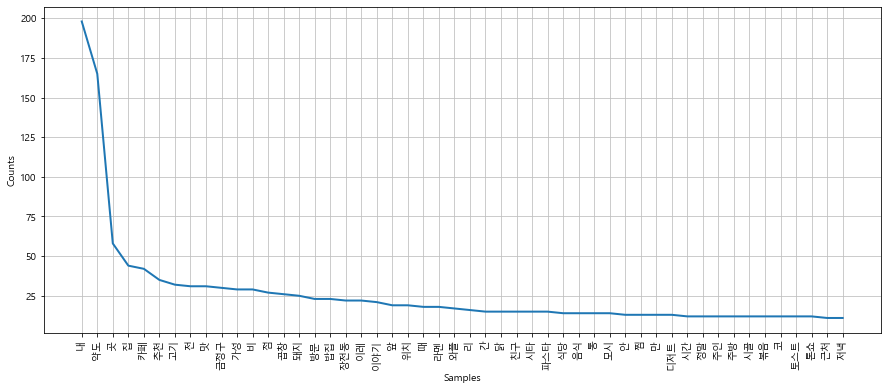

In [32]:
plt.figure( figsize=( 15, 6) )
ko.plot( 50 )
plt.show()

In [33]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

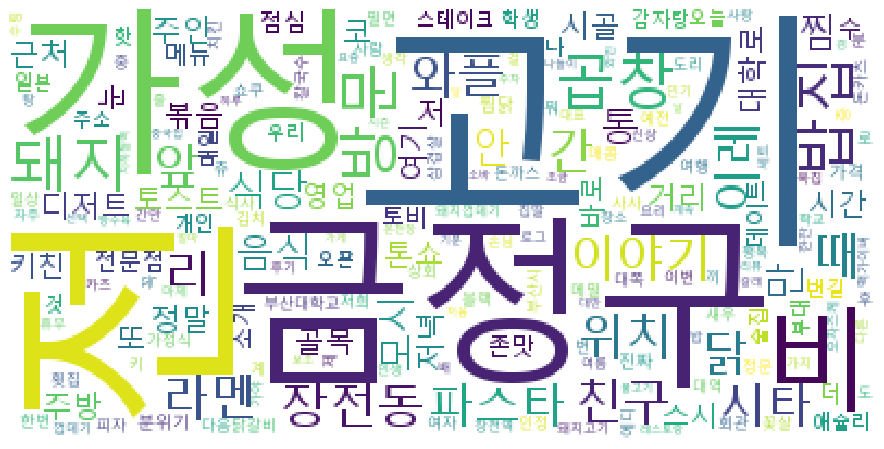

In [40]:
data = ko.vocab().most_common(300)
fontPath = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud( font_path=fontPath,
                       relative_scaling =0.2,
                      background_color='white').generate_from_frequencies(dict(data))
plt.figure( figsize=(16,8) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### gensim 이용

In [41]:
import gensim
from gensim.models import word2vec

In [42]:
t     = Okt()
# 수집 데이터 원본 : news_texts
lines = news_texts.copy()

In [43]:
news_texts

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    부산대   부산대 존맛   부산대 술집   부산대밥집   부산 부대 맛집   부산대 카페   부대 맛집   부산 온천장 맛집   부산대 스시   부산대 혼밥     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 ' 한우 안거미?! 부산대맛집 『형제식육식당』 2019.09.10.  작은 식당처럼 보여도 부산대 근처에서 꽤나 인지도가 있는 식당처럼... 원래 새로운 맛집에서는 모험이 필요한법 아니겠어요? ㅎㅎ 부산대 맛집 까지 왔는데 모험을...   음악여행기자♡원시 blog.daum.net/jejumooni/2076 블로그 내 검색   ',
 ' 부산대 맛집 학생들의 취향저격! 어제  후다닥 칼퇴하고 다녀온"부산대 맛집" 저녁에 롱패딩 입는 사람들도 보일만큼... 구워삶기 주소 : 부산 금정구 부산대학로 49 번호 : 051-513-9393 내부는 겉에서 보는 것보다...   방팀장의 퇴근후에 blog.naver.com/lys97... 블로그 내 검색 약도   ',
 ' 부산대 맛집 앞으로도 쭈욱! 3일 전  한분이 부산대 맛집인데 대학가라 그런지 한우를 취급하는데도 일반 고깃집과 큰... 맛집의 기운이 강하게 느껴지는 가게의 입구에서 모임원들을 잠시 기다리는데...   매일 봄날같아라 blog.naver.com/icoca... 블로그 내 검색 약도   ',
 ' 요즘 핫한 곱토리탕 묵으러간 부산대 맛집 2019.10.06.  안녕하세요~ "부산대 맛집"소식 들고왔어요! 몇일동안의 리프레쉬는 너무... 부산대 에 오신다면 꼭 이맛집 으로 들리셧으면 합니다. 부산대 쪽에서 인기 많은 시간이라서...   MAN남성의원입니다 bl

In [44]:
# 트위터의 형태소 분석을 통해 나오는 요소중 조사, 어미등등 제거
REMOVE_POS = ['Josa','Eomi','Punctuation']
results = []
for line in lines:
    m = t.pos( line, norm=True, stem=True )
    # 조사나, 어미 제거 => 분석상 의미 없는 부분 제거
    r = [ word[0] for word in m if not word[1] in REMOVE_POS ]
    # 워드들을 공백 기준으로 한문장 구성
    r1 = (' '.join( r )).strip()
    # 최종 전처리한 데이터 모아둠
    results.append( r1 )

In [45]:
 # 데이터 원본저장
with open( './data/search_0.data', 'w', encoding='utf-8' ) as f:
    f.write( '\n'.join( results ) )

FileNotFoundError: [Errno 2] No such file or directory: './data/search_0.data'

In [46]:
# 모델 저장
data  = word2vec.LineSentence( './data/search_0.data' )
model = word2vec.Word2Vec( data, size=200, window=10, hs=1, min_count=2, sg=1 )
model.save( './data/search_0.model' )

FileNotFoundError: [Errno 2] No such file or directory: './data/search_0.data'

In [79]:
# 모델 로드
model = word2vec.Word2Vec.load( './data/search_0.model' )

In [83]:
# 유사 단어 검사
model.wv.most_similar( positive=['맛집'] )

[('대', 0.9784023761749268),
 ('부산', 0.9764284491539001),
 ('존맛', 0.9445884823799133),
 ('술집', 0.9436258673667908),
 ('밥집', 0.9394535422325134),
 ('모시', 0.9297659993171692),
 ('부대', 0.9271175861358643),
 ('혼밥', 0.8931391835212708),
 ('도움말', 0.891798734664917),
 ('본점', 0.8771034479141235)]